<a href="https://colab.research.google.com/github/theorignalmapdcodex/aipi590_i-8_aa-ap/blob/main/notebooks/adversarial_patch_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

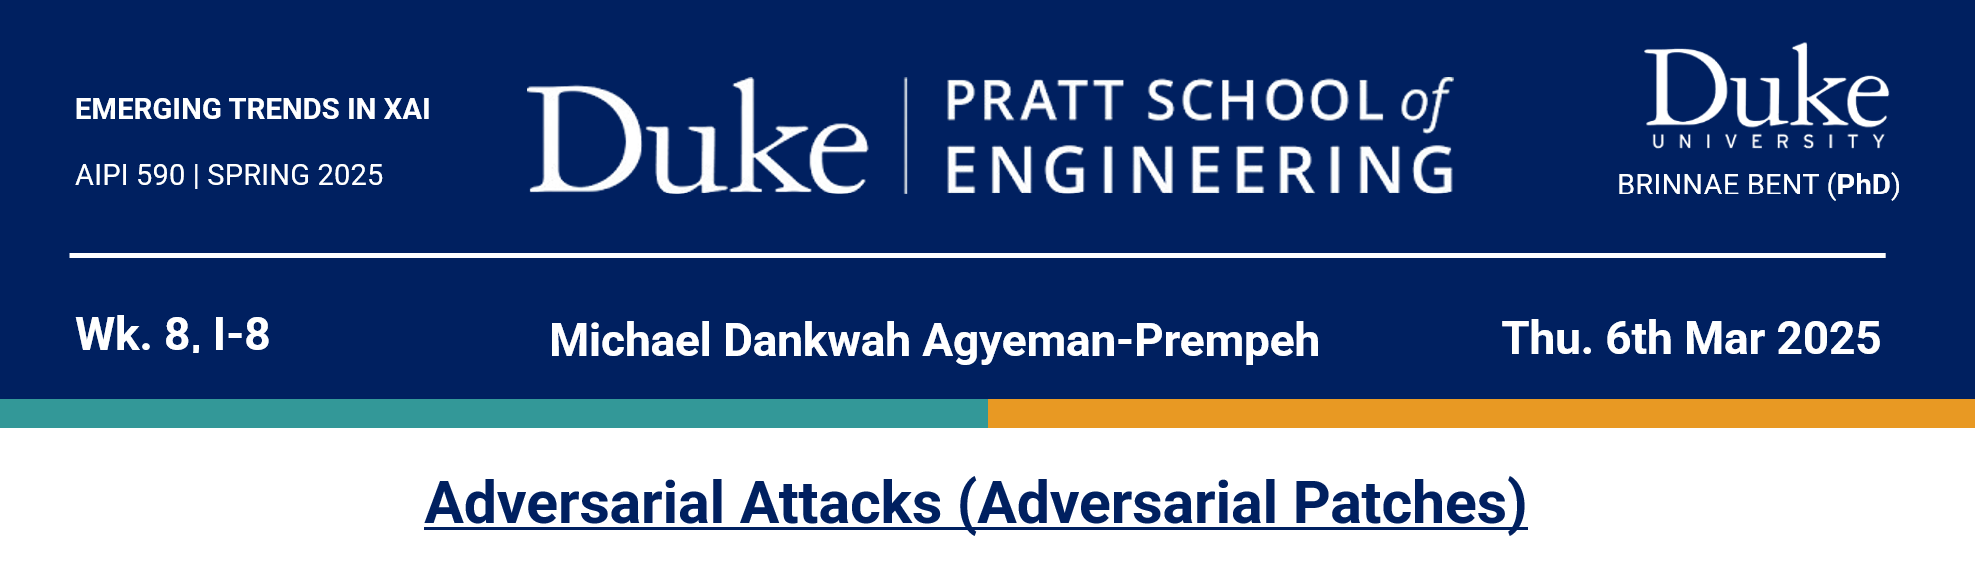

### 🔃 **Downloading Files Externally [the dataset of use & the requirements.txt file] for Processing as well as Package Installation (With the Idea of Sharing to Others)**

In [1]:
!pip install -U gdown  # Installing gdown if not already installed

# A - Grabbing actual file IDs from the Google Drive shared links
reqtxt_file_id = "1U4V_9N1I4msCNDgi39MpMfEDtgG-xVko"

# B - Saving file to local varible for ease of use
reqtxt_output_file = "requirements.txt"

# C - Download the requirements file
!gdown "https://drive.google.com/uc?id={reqtxt_file_id}" -O {reqtxt_output_file}

Downloading...
From: https://drive.google.com/uc?id=1U4V_9N1I4msCNDgi39MpMfEDtgG-xVko
To: /content/requirements.txt
100% 93.0/93.0 [00:00<00:00, 266kB/s]


>#### 🔗 **1. GitHub Link:**
- Click [here](https://github.com/theorignalmapdcodex/aipi590_i-8_aa-ap/blob/main/notebooks/adversarial_patch_generation.ipynb) to access the *GitHub repository .ipynb* file for this assignment.

##🥅 **Assignment Goal:**
### *The goal of this assignment is to design and implement an effective adversarial patch capable of fooling a pre-trained ResNet34 image classification model. I will leverage a class from the ImageNet dataset to create the patch. The project will demonstrate my understanding by producing a physical patch that successfully alters the model's predictions in a live test showcasing creative application of adversarial techniques.*


--------------------------------------------------------------------------------

In [2]:
# To ignore warnings for code output to look clean
import warnings
warnings.filterwarnings("ignore")

In [3]:
# NB: You can choose to un-comment and clone if not, the code book should run fine from 'gdown' approach
# import os

# # Remove Colab default sample_data if it exists
# if os.path.exists("./sample_data"):
#     !rm -r ./sample_data

# # Clone GitHub files to colab workspace
# repo_name = f'{aipi590_i-5_edl}'

# # Check if the repo already exists
# if not os.path.exists("/content/" + repo_name):
#     git_path = f'{https://github.com/theorignalmapdcodex/aipi590_i-5_edl.git}'
#     !git clone "{git_path}"
# else:
#     print(f"{aipi590_i-5_edl} already exists.")

# # Change working directory to location of notebook
# path_to_notebook = os.path.join("/content/" + aipi590_i-5_edl)
# %cd "{path_to_notebook}"
# %ls

## 📚 **I. Libraries & Packages Installation**

Before I proceed to developing any `saliency map` on my test images, `zebras`, let's first install the right libraries and packages.

In [4]:
#Install the requirements for this package and included in requirements.txt file for the purposes of working on Colab independently
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [5]:
#----Standard libraries----#
import os
import json
import math
import time
import numpy as np
import tabulate
import scipy.linalg

##----Imports for plotting----##
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgb
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 2.0
import seaborn as sns
sns.set()

###----Progress bar----###
from tqdm.notebook import tqdm

import urllib.request
from urllib.error import HTTPError
import zipfile

####----PyTorch----####
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
# Torchvision
import torchvision
from torchvision.datasets import CIFAR10
from torchvision import transforms
# PyTorch Lightning
try:
    import pytorch_lightning as pl
except ModuleNotFoundError: # Google Colab does not have PyTorch Lightning installed by default. Hence, we do it here if necessary
    !pip install --quiet pytorch-lightning>=1.4
    import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint


##🛣️ **III. Approach:**
### To ensure reproducible and efficient patch creation for our ResNet34 attack, we'll first define dataset and model paths, set a consistent random seed, and then select the optimal computational device, prioritizing GPU acceleration if available.


In [6]:
# Path to the folder where the datasets are/should be downloaded (e.g. MNIST)
DATASET_PATH = "../data"
# Path to the folder where the pretrained models are saved
CHECKPOINT_PATH = "../saved_models/tutorial10"

# Setting the seed
pl.seed_everything(42)

# Ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Fetching the device that will be used throughout this notebook
device = torch.device("cpu") if not torch.cuda.is_available() else torch.device("cuda:0")
print("Using device", device)

INFO:lightning_fabric.utilities.seed:Seed set to 42


Using device cuda:0


Downloading the TinyImageNet dataset and pretrained patches from a GitHub repository and unzipping the files.

In [7]:
# Github URL where the dataset is stored for this tutorial
base_url = "https://raw.githubusercontent.com/phlippe/saved_models/main/tutorial10/"
# Files to download
pretrained_files = [(DATASET_PATH, "TinyImageNet.zip"), (CHECKPOINT_PATH, "patches.zip")]
# Create checkpoint path if it doesn't exist yet
os.makedirs(DATASET_PATH, exist_ok=True)
os.makedirs(CHECKPOINT_PATH, exist_ok=True)

# For each file, check whether it already exists. If not, try downloading it.
for dir_name, file_name in pretrained_files:
    file_path = os.path.join(dir_name, file_name)
    if not os.path.isfile(file_path):
        file_url = base_url + file_name
        print(f"Downloading {file_url}...")
        try:
            urllib.request.urlretrieve(file_url, file_path)
        except HTTPError as e:
            print("Something went wrong. Please try to download the file from the GDrive folder, or contact the author with the full output including the following error:\n", e)
        if file_name.endswith(".zip"):
            print("Unzipping file...")
            with zipfile.ZipFile(file_path, 'r') as zip_ref:
                zip_ref.extractall(file_path.rsplit("/",1)[0])

Unzipping file...
Unzipping file...


Loading the model, ResNet34

In [8]:
# Load CNN architecture pretrained on ImageNet
os.environ["TORCH_HOME"] = CHECKPOINT_PATH
pretrained_model = torchvision.models.resnet34(weights='IMAGENET1K_V1')
pretrained_model = pretrained_model.to(device)

# No gradients needed for the network
pretrained_model.eval()
for p in pretrained_model.parameters():
    p.requires_grad = False

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to ../saved_models/tutorial10/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 102MB/s]


In [9]:
# Mean and standard deviation for normalizing images using the standard ImageNet statistics
NORM_MEAN = np.array([0.485, 0.456, 0.406])  # Mean RGB values for ImageNet
NORM_STD = np.array([0.229, 0.224, 0.225])   # Standard deviation for ImageNet

# Transformation pipeline for preprocessing the images:
# Converts the images to tensors and normalizes them using ImageNet statistics.
plain_transforms = transforms.Compose([
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=NORM_MEAN, std=NORM_STD)  # Normalize using ImageNet mean and std
])

# Load the TinyImageNet dataset and create a DataLoader for batching and shuffling data.
imagenet_path = os.path.join(DATASET_PATH, "TinyImageNet/")
assert os.path.isdir(imagenet_path), f"Could not find the ImageNet dataset at expected path \"{imagenet_path}\". " + \
                                     f"Ensure that the dataset is downloaded, or update the {DATASET_PATH=} variable."
# Loading the dataset using ImageFolder, which assumes images are organized by class folders.
dataset = torchvision.datasets.ImageFolder(root=imagenet_path, transform=plain_transforms)

# DataLoader to iterate over the dataset in batches of 32 images.
data_loader = data.DataLoader(dataset, batch_size=32, shuffle=False, drop_last=False, num_workers=8)

# Load label names from a JSON file for mapping class indices to their corresponding labels.
with open(os.path.join(imagenet_path, "label_list.json"), "r") as f:
    label_names = json.load(f)

# Function to get the index of a label (class name) from the list of label names.
def get_label_index(lab_str):
    assert lab_str in label_names, f"Label \"{lab_str}\" not found. Check the spelling of the class."
    return label_names.index(lab_str)

Verifying the performance of the model before adversarial attack.

In [10]:
def eval_model(dataset_loader, img_func=None):
    tp, tp_5, counter = 0., 0., 0.
    for imgs, labels in tqdm(dataset_loader, desc="Validating..."):
        imgs = imgs.to(device)
        labels = labels.to(device)
        if img_func is not None:
            imgs = img_func(imgs, labels)
        with torch.no_grad():
            preds = pretrained_model(imgs)
        tp += (preds.argmax(dim=-1) == labels).sum()
        tp_5 += (preds.topk(5, dim=-1)[1] == labels[...,None]).any(dim=-1).sum()
        counter += preds.shape[0]
    acc = tp.float().item()/counter
    top5 = tp_5.float().item()/counter
    print(f"Top-1 error: {(100.0 * (1 - acc)):4.2f}%")
    print(f"Top-5 error: {(100.0 * (1 - top5)):4.2f}%")
    return acc, top5

In [11]:
_ = eval_model(data_loader)

Validating...:   0%|          | 0/157 [00:00<?, ?it/s]

Top-1 error: 19.38%
Top-5 error: 4.38%


## ⚙️ **IV. Functions to Support Implementation**

In [12]:
def show_prediction(img, label, pred, K=5, adv_img=None, noise=None):

    if isinstance(img, torch.Tensor):
        # Tensor image to numpy
        img = img.cpu().permute(1, 2, 0).numpy()
        img = (img * NORM_STD[None,None]) + NORM_MEAN[None,None]
        img = np.clip(img, a_min=0.0, a_max=1.0)
        label = label.item()

    # Plot on the left the image with the true label as title.
    # On the right, have a horizontal bar plot with the top k predictions including probabilities
    if noise is None or adv_img is None:
        fig, ax = plt.subplots(1, 2, figsize=(10,2), gridspec_kw={'width_ratios': [1, 1]})
    else:
        fig, ax = plt.subplots(1, 5, figsize=(12,2), gridspec_kw={'width_ratios': [1, 1, 1, 1, 2]})

    ax[0].imshow(img)
    ax[0].set_title(label_names[label])
    ax[0].axis('off')

    if adv_img is not None and noise is not None:
        # Visualize adversarial images
        adv_img = adv_img.cpu().permute(1, 2, 0).numpy()
        adv_img = (adv_img * NORM_STD[None,None]) + NORM_MEAN[None,None]
        adv_img = np.clip(adv_img, a_min=0.0, a_max=1.0)
        ax[1].imshow(adv_img)
        ax[1].set_title('Adversarial')
        ax[1].axis('off')
        # Visualize noise
        noise = noise.cpu().permute(1, 2, 0).numpy()
        noise = noise * 0.5 + 0.5 # Scale between 0 to 1
        ax[2].imshow(noise)
        ax[2].set_title('Noise')
        ax[2].axis('off')
        # buffer
        ax[3].axis('off')

    if abs(pred.sum().item() - 1.0) > 1e-4:
        pred = torch.softmax(pred, dim=-1)
    topk_vals, topk_idx = pred.topk(K, dim=-1)
    topk_vals, topk_idx = topk_vals.cpu().numpy(), topk_idx.cpu().numpy()
    ax[-1].barh(np.arange(K), topk_vals*100.0, align='center', color=["C0" if topk_idx[i]!=label else "C2" for i in range(K)])
    ax[-1].set_yticks(np.arange(K))
    ax[-1].set_yticklabels([label_names[c] for c in topk_idx])
    ax[-1].invert_yaxis()
    ax[-1].set_xlabel('Confidence')
    ax[-1].set_title('Predictions')

    plt.show()
    plt.close()

<mark>[OPTIONAL]</mark> Visualizing few images below to test the model (prior to adversial attack)

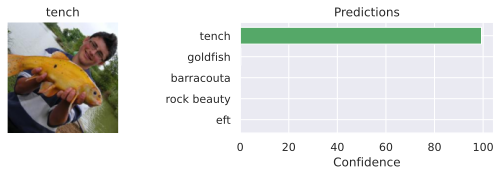

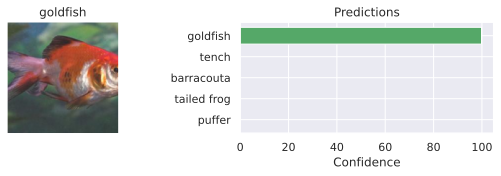

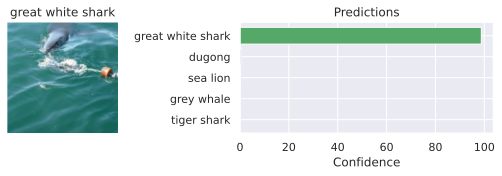

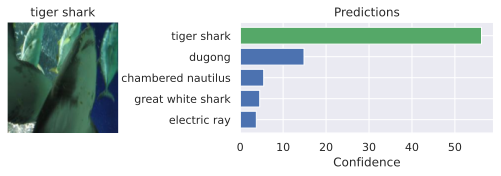

In [13]:
exmp_batch, label_batch = next(iter(data_loader))
with torch.no_grad():
    preds = pretrained_model(exmp_batch.to(device))
for i in range(1,17,5):
    show_prediction(exmp_batch[i], label_batch[i], preds[i])

For each image in the batch, I'll randomly choose a position and overlay the adversarial patch, ensuring each gets its own unique placement.

In [14]:
def place_patch(img, patch):
    for i in range(img.shape[0]):
        h_offset = np.random.randint(0,img.shape[2]-patch.shape[1]-1)
        w_offset = np.random.randint(0,img.shape[3]-patch.shape[2]-1)
        img[i,:,h_offset:h_offset+patch.shape[1],w_offset:w_offset+patch.shape[2]] = patch_forward(patch)
    return img

I will then scale the patch's pixel values to fit within a normal image's range.

In [15]:
TENSOR_MEANS, TENSOR_STD = torch.FloatTensor(NORM_MEAN)[:,None,None], torch.FloatTensor(NORM_STD)[:,None,None]
def patch_forward(patch):
    # Map patch values from [-infty,infty] to ImageNet min and max
    patch = (torch.tanh(patch) + 1 - 2 * TENSOR_MEANS) / (2 * TENSOR_STD)
    return patch

Test the patch's success by placing it randomly on images, checking if the model predicts the target class (and if it's in the top 5), then report accuracy.

In [16]:
def eval_patch(model, patch, val_loader, target_class):
    model.eval()
    tp, tp_5, counter = 0., 0., 0.
    with torch.no_grad():
        for img, img_labels in tqdm(val_loader, desc="Validating...", leave=False):
            # For stability, place the patch at 4 random locations per image, and average the performance
            for _ in range(4):
                patch_img = place_patch(img, patch)
                patch_img = patch_img.to(device)
                img_labels = img_labels.to(device)
                pred = model(patch_img)
                tp += torch.logical_and(pred.argmax(dim=-1) == target_class, img_labels != target_class).sum()
                tp_5 += torch.logical_and((pred.topk(5, dim=-1)[1] == target_class).any(dim=-1), img_labels != target_class).sum()
                counter += (img_labels != target_class).sum()
    acc = tp/counter
    top5 = tp_5/counter
    return acc, top5

Iteratively optimize the patch by placing it randomly on training images, guiding the model towards the target class via Stochastic Gradient Descent (SGD), and then evaluate the patch's performance on validation images.

In [17]:
def patch_attack(model, target_class, patch_size=64, num_epochs=5):
    train_set, val_set = torch.utils.data.random_split(dataset, [4500, 500])
    train_loader = data.DataLoader(train_set, batch_size=32, shuffle=True, drop_last=True, num_workers=8)
    val_loader = data.DataLoader(val_set, batch_size=32, shuffle=False, drop_last=False, num_workers=4)

    # Create parameter and optimizer
    if not isinstance(patch_size, tuple):
        patch_size = (patch_size, patch_size)
    patch = nn.Parameter(torch.zeros(3, patch_size[0], patch_size[1]), requires_grad=True)
    optimizer = torch.optim.SGD([patch], lr=1e-1, momentum=0.8)
    loss_module = nn.CrossEntropyLoss()

    # Training loop
    for epoch in range(num_epochs):
        t = tqdm(train_loader, leave=False)
        for img, _ in t:
            img = place_patch(img, patch)
            img = img.to(device)
            pred = model(img)
            labels = torch.zeros(img.shape[0], device=pred.device, dtype=torch.long).fill_(target_class)
            loss = loss_module(pred, labels)
            optimizer.zero_grad()
            loss.mean().backward()
            optimizer.step()
            t.set_description(f"Epoch {epoch}, Loss: {loss.item():4.2f}")

    # Final validation
    acc, top5 = eval_patch(model, patch, val_loader, target_class)

    return patch.data, {"acc": acc.item(), "top5": top5.item()}

In [18]:
# Load evaluation results of the pretrained patches
json_results_file = os.path.join(CHECKPOINT_PATH, "patch_results.json")
json_results = {}
if os.path.isfile(json_results_file):
    with open(json_results_file, "r") as f:
        json_results = json.load(f)

# If you train new patches, you can save the results via calling this function
def save_results(patch_dict):
    result_dict = {cname: {psize: [t.item() if isinstance(t, torch.Tensor) else t
                                   for t in patch_dict[cname][psize]["results"]]
                           for psize in patch_dict[cname]}
                   for cname in patch_dict}
    with open(os.path.join(CHECKPOINT_PATH, "patch_results.json"), "w") as f:
        json.dump(result_dict, f, indent=4)

In [19]:
def get_patches(class_names, patch_sizes):
    result_dict = dict()

    # Loop over all classes and patch sizes
    for name in class_names:
        result_dict[name] = dict()
        for patch_size in patch_sizes:
            c = label_names.index(name)
            file_name = os.path.join(CHECKPOINT_PATH, f"{name}_{patch_size}_patch.pt")
            # Load patch if pretrained file exists, otherwise start training
            if not os.path.isfile(file_name):
                patch, val_results = patch_attack(pretrained_model, target_class=c, patch_size=patch_size, num_epochs=5)
                print(f"Validation results for {name} and {patch_size}:", val_results)
                torch.save(patch, file_name)
            else:
                patch = torch.load(file_name)
            # Load evaluation results if exist, otherwise manually evaluate the patch
            if name in json_results:
                results = json_results[name][str(patch_size)]
            else:
                results = eval_patch(pretrained_model, patch, data_loader, target_class=c)

            # Store results and the patches in a dict for better access
            result_dict[name][patch_size] = {
                "results": results,
                "patch": patch
            }

    return result_dict

---

## ⚙️ **V. Generating Patches for 'toaster', 'goldfish' and 'school bus' from [list of Image Classes](https://github.com/theorignalmapdcodex/mapds-duke-aipi-xai/blob/main/adversarial-ai-example-notebooks/imagenet_classes.txt) in the size 32, 48 and 64**

In [53]:
class_names = ['toaster', 'goldfish', 'school bus']
patch_sizes = [32, 48, 64]

patch_dict = get_patches(class_names, patch_sizes)
save_results(patch_dict)

KeyError: 'results'

Showing the patches now!

KeyError: 'flamingo'

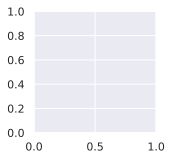

In [52]:
def show_patches():
    fig, ax = plt.subplots(len(patch_sizes), len(class_names), figsize=(len(class_names)*2.2, len(patch_sizes)*2.2))
    for c_idx, cname in enumerate(class_names):
        for p_idx, psize in enumerate(patch_sizes):
            patch = patch_dict[cname][psize]["patch"]
            patch = (torch.tanh(patch) + 1) / 2 # Parameter to pixel values
            patch = patch.cpu().permute(1, 2, 0).numpy()
            patch = np.clip(patch, a_min=0.0, a_max=1.0)
            ax[p_idx][c_idx].imshow(patch)
            ax[p_idx][c_idx].set_title(f"{cname}, size {psize}")
            ax[p_idx][c_idx].axis('off')
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.show()
show_patches()

Let's visualize the results via tables:

In [22]:
from IPython.display import display, HTML

def show_table(top_1=True):
    i = 0 if top_1 else 1
    table = [[name] + [f"{(100.0 * patch_dict[name][psize]['results'][i]):4.2f}%" for psize in patch_sizes]
             for name in class_names]
    display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["Class name"] + [f"Patch size {psize}x{psize}" for psize in patch_sizes])))

In [23]:
show_table(top_1=True)

Class name,Patch size 32x32,Patch size 48x48,Patch size 64x64
toaster,48.89%,90.48%,98.58%
goldfish,69.53%,93.53%,98.34%
school bus,78.79%,93.95%,98.22%


In [24]:
show_table(top_1=False)

Class name,Patch size 32x32,Patch size 48x48,Patch size 64x64
toaster,72.02%,98.12%,99.93%
goldfish,86.31%,99.07%,99.95%
school bus,91.64%,99.15%,99.89%


Now unto some patch attacking!

In [25]:
def perform_patch_attack(patch):
    patch_batch = exmp_batch.clone()
    patch_batch = place_patch(patch_batch, patch)
    with torch.no_grad():
        patch_preds = pretrained_model(patch_batch.to(device))
    for i in range(1,17,5):
        show_prediction(patch_batch[i], label_batch[i], patch_preds[i])

In [50]:
perform_patch_attack(patch_dict['toaster'][64]['patch'])

TypeError: place_patch() missing 1 required positional argument: 'mask'

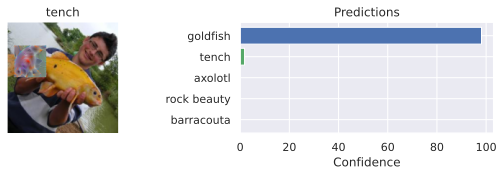

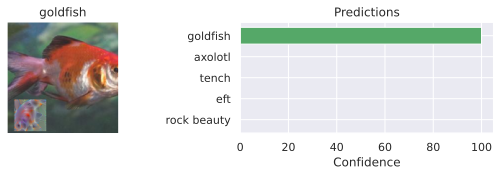

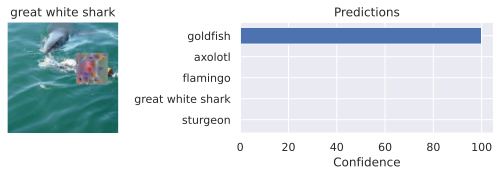

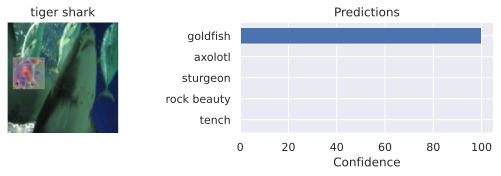

In [27]:
perform_patch_attack(patch_dict['goldfish'][64]['patch'])

In [47]:
perform_patch_attack(patch_dict['school bus'][64]['patch'])

TypeError: place_patch() missing 1 required positional argument: 'mask'

The above images show the effect of placing small, specially designed "adversarial patches" onto images of various aquatic animals. The patches force the AI to misclassify the images in predictable ways regardless of what the original image contains.

In `Image 1`, a "toaster" patch is applied to different images (tench fish, goldfish, great white shark, and tiger shark). Despite the very different subjects, the model consistently classifies all images as "toaster" with high confidence.

In `Image 2`, a "goldfish" patch is applied to the same set of images, causing the classifier to identify everything as "goldfish" with high confidence, even when the actual subject is a shark.

In `Image 3`, a "school bus" patch similarly tricks the model into seeing school buses in every image, regardless of what's actually pictured.

This demonstrates a security vulnerability in many computer vision systems - adversarial patches can be physically placed on objects in the real world to deliberately cause AI misclassification, which could potentially be exploited to bypass security systems, confuse autonomous vehicles, or otherwise manipulate AI-based decision systems.

## ⚙️ **VI. Adding a creative components to my patch generation (“Disguising" the patch in a sticker - a paw print, like they did in [Brown, et.al.](https://arxiv.org/pdf/1712.09665.pdf))**

In [ ]:
# Function to create a smiley face within a circular mask and ensure black background
def create_smiley_mask(patch_size):
    mask = np.ones((patch_size, patch_size), dtype=np.float32)  # Start with all ones (white background for the patch)
    radius = patch_size // 2
    y, x = np.ogrid[-radius:radius, -radius:radius]
    mask_circle = x ** 2 + y ** 2 <= radius ** 2  # Circle mask

    # Set the area outside the circle to zero (black background)
    mask[~mask_circle] = 0

    # Add smiley features inside the circle (you can adjust these for customization)
    eye_y, eye_x = radius // 2, radius // 3
    mask[eye_y-3:eye_y+3, eye_x-3:eye_x+3] = 0  # Left eye (black)
    mask[eye_y-3:eye_y+3, patch_size - eye_x-3:patch_size - eye_x+3] = 0  # Right eye (black)
    mask[radius + 5:radius + 8, radius-8:radius + 8] = 0  # Mouth (black)

    return torch.FloatTensor(mask).unsqueeze(0).repeat(3, 1, 1)  # 3 channels for RGB

In [ ]:
# Function to place a circular patch with a black background and smiley face on the image
def place_patch(img, patch, mask):
    for i in range(img.shape[0]):
        h_offset = np.random.randint(0, img.shape[2] - patch.shape[1] - 1)
        w_offset = np.random.randint(0, img.shape[3] - patch.shape[2] - 1)
        img_patch = patch_forward(patch) * mask
        img[i, :, h_offset:h_offset + patch.shape[1], w_offset:w_offset + patch.shape[2]] = img_patch
    return img

In [ ]:
def patch_forward(patch):
    patch = (torch.tanh(patch) + 1 - 2 * TENSOR_MEANS) / (2 * TENSOR_STD)
    return patch

In [ ]:
def eval_patch(model, patch, mask, val_loader, target_class):
    model.eval()
    tp, tp_5, counter = 0., 0., 0.
    with torch.no_grad():
        for img, img_labels in tqdm(val_loader, desc="Validating...", leave=False):
            for _ in range(4):
                patch_img = place_patch(img, patch, mask)
                patch_img = patch_img.to(device)
                img_labels = img_labels.to(device)
                pred = model(patch_img)
                tp += torch.logical_and(pred.argmax(dim=-1) == target_class, img_labels != target_class).sum()
                tp_5 += torch.logical_and((pred.topk(5, dim=-1)[1] == target_class).any(dim=-1), img_labels != target_class).sum()
                counter += (img_labels != target_class).sum()
    acc = tp / counter
    top5 = tp_5 / counter
    return acc, top5

In [ ]:
def patch_attack(model, target_class, patch_size=64, num_epochs=5):
    train_set, val_set = torch.utils.data.random_split(dataset, [4500, 500])
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True, drop_last=True, num_workers=8)
    val_loader = torch.utils.data.DataLoader(val_set, batch_size=32, shuffle=False, drop_last=False, num_workers=4)

    # Create patch and mask
    patch = nn.Parameter(torch.zeros(3, patch_size, patch_size), requires_grad=True)
    mask = create_smiley_mask(patch_size)

    optimizer = torch.optim.SGD([patch], lr=1e-1, momentum=0.8)
    loss_module = nn.CrossEntropyLoss()

    # Training loop
    for epoch in range(num_epochs):
        t = tqdm(train_loader, leave=False)
        for img, _ in t:
            img = place_patch(img, patch, mask)
            img = img.to(device)
            pred = model(img)
            labels = torch.zeros(img.shape[0], device=pred.device, dtype=torch.long).fill_(target_class)
            loss = loss_module(pred, labels)
            optimizer.zero_grad()
            loss.mean().backward()
            optimizer.step()
            t.set_description(f"Epoch {epoch}, Loss: {loss.item():4.2f}")

    # Final validation
    acc, top5 = eval_patch(model, patch, mask, val_loader, target_class)

    return patch.data, {"acc": acc.item(), "top5": top5.item()}

In [ ]:
def get_patches(class_names, patch_sizes):
    result_dict = dict()

    for name in class_names:
        result_dict[name] = dict()
        for patch_size in patch_sizes:
            c = label_names.index(name)
            file_name = os.path.join(CHECKPOINT_PATH, f"{name}_{patch_size}_patch.pt")
            if not os.path.isfile(file_name):
                patch, val_results = patch_attack(pretrained_model, target_class=c, patch_size=patch_size, num_epochs=5)
                print(f"Validation results for {name} and {patch_size}:", val_results)
                torch.save(patch, file_name)
            else:
                patch = torch.load(file_name)
            result_dict[name][patch_size] = {
                "patch": patch
            }
    return result_dict

In [48]:
def show_patches(patch_dict, class_names, patch_sizes):
    fig, ax = plt.subplots(len(patch_sizes), len(class_names), figsize=(len(class_names)*2.2, len(patch_sizes)*2.2))

    if len(patch_sizes) == 1:
        ax = [ax]
    if len(class_names) == 1:
        ax = [[a] for a in ax]

    for c_idx, cname in enumerate(class_names):
        for p_idx, psize in enumerate(patch_sizes):
            patch = patch_dict[cname][psize]["patch"]
            patch = (torch.tanh(patch) + 1) / 2
            patch = patch.cpu().permute(1, 2, 0).numpy()
            patch = np.clip(patch, a_min=0.0, a_max=1.0)

            # Ensure black background outside the circle
            background = np.zeros_like(patch)
            mask = create_smiley_mask(psize).cpu().numpy().transpose(1, 2, 0)
            patch = patch * mask + background * (1 - mask)

            ax[p_idx][c_idx].imshow(patch)
            ax[p_idx][c_idx].set_title(f"{cname}, size {psize}")
            ax[p_idx][c_idx].axis('off')

    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.show()

In [49]:
# Visualizing the disguise of 'a paw print'
class_names = ['flamingo']
patch_sizes = [64]

patch_dict = get_patches(class_names, patch_sizes)
show_patches(patch_dict, class_names, patch_sizes)

TypeError: 'int' object is not subscriptable

---

## 🔚 **Conclusion:**


From the above results (Viz #2), the IoU scores for all 5 images were low (i.e., < 0.3), indicating a poor or no significant overlap. The major key finding for me was maybe, the saliency map is likely focusing on the wrong areas and hence the approach to use `saliency maps` for testing this hypotheses does a partial job.

My quest to use `saliency maps` was to justify that it could do a good job as `TVAC` could. Hopefully in my next report, I will leverage TVAC and some testing to verify my hypothese.

In conclusion, it will be very hard to reject the null hypothesis ($H_0$) as our second step to verify the initial rejection, crossed out.

## <mark>*End Of Report*</mark>